## BT4211 Group 9 Hotel Project 

### Clean the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HotelCustomersDataset_Cleaned.csv')
df.head()

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,...,0,0,0,0,0,1,0,0,0,0
1,2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,...,0,0,1,0,0,0,0,0,0,1
3,4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,...,0,0,1,0,0,0,0,0,1,0


In [3]:
df.shape

(75397, 49)

In [4]:
df.describe()

,Unnamed: 0,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
count,75397.000000,75397.000000,75397.00000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,...,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000,75397.000000
mean,41458.629853,41459.629853,47.43962,457.372482,69.406104,311.787922,70.174372,0.001950,0.000610,0.826638,...,0.136146,0.006525,0.826863,0.002958,0.005093,0.025147,0.131491,0.116583,0.573869,0.144860
std,23946.219003,23946.219003,14.63154,310.607758,88.717833,365.144705,112.928400,0.067813,0.029129,0.688431,...,0.342946,0.080517,0.378368,0.054304,0.071184,0.156572,0.337938,0.320925,0.494517,0.351962
min,0.000000,1.000000,18.00000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20943.000000,20944.000000,36.00000,184.000000,1.000000,91.200000,7.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40780.000000,40781.000000,48.00000,414.000000,34.000000,246.900000,42.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,61799.000000,61800.000000,58.00000,722.000000,108.000000,415.000000,91.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,83588.000000,83589.000000,122.00000,1095.000000,588.000000,9682.400000,7730.250000,9.000000,3.000000,66.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Create RFM_df
RFM_df = df.assign(
    Recency=df['DaysSinceLastStay'], 
    Frequency=df['BookingsCheckedIn'], 
    Monetary=df['LodgingRevenue'] + df['OtherRevenue'])
RFM_df = RFM_df[['ID','Recency', 'Frequency', 'Monetary']]
RFM_df.head()

,ID,Recency,Frequency,Monetary
0,1,151,3,476.3
1,3,-1,0,0.0
2,4,1100,1,300.0
3,5,-1,0,0.0
4,6,1097,1,254.0


#### Investigate customers with `Monetary` = 0

In [6]:
# confirm whether customers with Monetary = 0 means they had never stayed at the hotel before
RFM_df[RFM_df['Monetary']==0]['Frequency'].value_counts()

0    15611
1      177
2        9
4        2
7        2
3        2
Name: Frequency, dtype: int64

In [7]:
RFM_df[RFM_df['Recency']==-1].shape

(15611, 4)

In [8]:
df['TotalRevenue'] = df['LodgingRevenue'] + df['OtherRevenue']
df[(df['TotalRevenue']==0) & (df['DaysSinceFirstStay']!=-1)][['MarketSegment_Complementary','MarketSegment_Groups','MarketSegment_Direct','MarketSegment_Travel Agent/Operator']].sum()

MarketSegment_Complementary            166
MarketSegment_Groups                    12
MarketSegment_Direct                     8
MarketSegment_Travel Agent/Operator      6
dtype: int64

- Confirmed that majority, but not all customers with `Monetary` = 0 means they never stayed at the hotel before.
- 15,611 customers were found to have `Monetary` = 0 as they never stayed at the hotel before since their `Recency` = -1 and `Frequency` = 0.
- Remaining 192 customers with `Monetary` = 0 have stayed at the hotel at least once. 
- Majority of these 192 customers belong to the 'Complementary' MarketSegment, which probably explains why they did not pay for the hotel stay. Other segments include 'Groups', 'Direct', and 'Travel Agent/Operator'.
- Since they are only 192 such customers (vvv small proportion), can just drop them and focus on higher valued customers.

In [9]:
# Only keep clients that had make a check-in in the past and is considered a client
print(f'There were {len(RFM_df)} customers at first.\n')

RFM_df = RFM_df[
    (RFM_df['Recency'] > 0) & 
    (RFM_df['Frequency'] != 0)  
   & (RFM_df['Monetary'] != 0)
    ]

print(f'After dropping customers who have not stayed at the hotel and/or have no monetary value, there are {len(RFM_df)} customers.\n')

print(RFM_df.head())

There were 75397 customers at first.

After dropping customers who have not stayed at the hotel and/or have no monetary value, there are 59593 customers.

   ID  Recency  Frequency  Monetary
0   1      151          3     476.3
2   4     1100          1     300.0
4   6     1097          1     254.0
6   8     1100          1     629.0
8  10     1098          1     243.0


In [10]:
RFM_df.describe()

,ID,Recency,Frequency,Monetary
count,59593.000000,59593.000000,59593.000000,59593.000000
mean,36561.772440,519.054939,1.042085,483.253420
std,22841.005167,301.082006,0.610004,436.730538
min,1.000000,1.000000,1.000000,1.000000
25%,17735.000000,248.000000,1.000000,242.000000
50%,33472.000000,520.000000,1.000000,381.300000
75%,53873.000000,788.000000,1.000000,579.500000
max,83589.000000,1104.000000,66.000000,11930.660000


### Check distribution of data

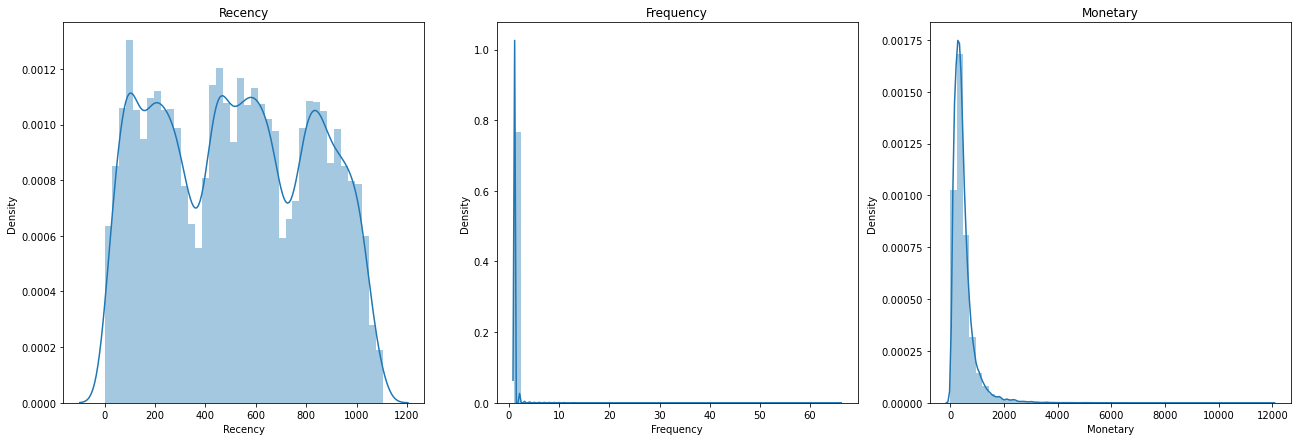

In [11]:
columns=["Recency","Frequency","Monetary"]
plt.figure(figsize=(22,7))
for i,j in enumerate(columns):
    plt.subplot(1,3,i+1)
    sns.distplot(RFM_df[j])
    plt.title('{}'.format(j))

#### Further investigate `Frequency` distribution

In [12]:
freq_dist=RFM_df.groupby('Frequency').size().rename("Percentage").transform(lambda x: x/RFM_df['Frequency'].sum())
freq_dist.to_frame()

,Percentage
Frequency,
1,0.938230
2,0.016924
3,0.001852
4,0.000870
5,0.000322
6,0.000290
7,0.000209
8,0.000161
9,0.000145


- `Frequency` value distribution is extremely skewed due to majority of customers being non-repeat customers, i.e. nearly 94% of them only stayed at the hotel once -> hence `Frequency` might not as important of a metric for the manager, so will not include `Frequency` in the RFM analysis for segmentation purposes

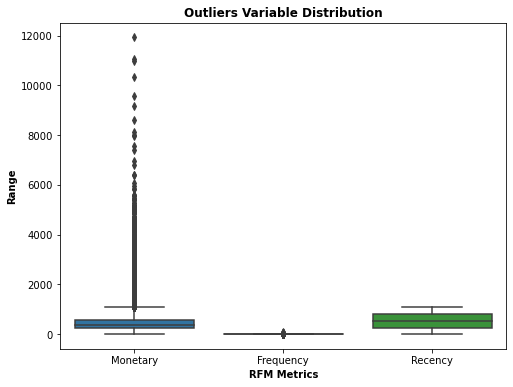

In [13]:
# Outlier Analysis
rfm_metrics = ['Monetary','Frequency','Recency']
plt.figure(figsize=(8,6))
sns.boxplot(data = RFM_df[rfm_metrics], orient="v")
plt.title("Outliers Variable Distribution", fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("RFM Metrics", fontweight = 'bold')
plt.show()

- `Monetary` value distribution is very skewed due to the presence of outliers with high monetary value.
- Extreme outliers are around those over 6,000 dollars, so drop these outliers.

#### Drop `Monetary` outliers

In [14]:
# Identify and remove outliers from the Monetary column
total_outliers = len(RFM_df[RFM_df['Monetary'] > 6000])
RFM_df = RFM_df[RFM_df['Monetary'] <= 6000]
print(f'After dropping {total_outliers} outliers, there are now {len(RFM_df)} customers.')

After dropping 17 outliers, there are now 59576 customers.


## Customer Segmentation 

- As the vast majority are non-repeat customers, the dataset will be split into two subsets - one with customers having `Frequency` value of 1, while the other having `Frequency` value over 1.

### Split dataset into the 2 subsets based on `Frequency` value

In [15]:
# create subset of customers with Frequency of 1
RFM_non_repeat_cust_df = RFM_df[RFM_df['Frequency']==1]

# create subset of customers with Frequency > 1
RFM_repeat_cust_df = RFM_df[RFM_df['Frequency']>1]

In [16]:
RFM_non_repeat_cust_df.shape, RFM_repeat_cust_df.shape

((58259, 4), (1317, 4))

### Do segmentation for customers with `Frequency` of 1 using k-means clustering

In [17]:
RFM_non_repeat_cust_df['Recency'].describe()

count    58259.000000
mean       522.860468
std        300.659721
min          1.000000
25%        254.000000
50%        525.000000
75%        791.000000
max       1104.000000
Name: Recency, dtype: float64

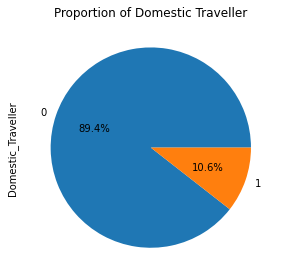

In [18]:
df[df['BookingsCheckedIn']==1]['Domestic_Traveller'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Proportion of Domestic Traveller')
plt.tight_layout()
plt.show()

- The `Recency` value for most of the customers who have only stayed at the hotel once is between 2-3 years, which is reasonable for a hotel business, especially when nearly 90% of customers are non-domestic travellers.
- This implies that `Recency` value is not that important of a metric to measure the value of a customer, but rather it is the `Monetary` value that is most important as they are likely to only stay at the hotel once within the span of 2-3 years. 
- Hence, the hotel should focus on maximising the customer's spending for every hotel stay. 
- As such, the segmentation will be done purely based on the customers' `Monetary` value.

In [19]:
kmeans_df = RFM_non_repeat_cust_df['Monetary']

### Standardise the data

In [20]:
scaler = StandardScaler()
scaled_kmeans_df = scaler.fit_transform(kmeans_df.values.reshape(-1,1))

scaled_df=pd.DataFrame(scaled_kmeans_df,columns=['scaled_monetary'])
scaled_df.sample(5)

,scaled_monetary
6309,-0.004680
35109,-0.040145
44686,-0.041412
27486,-0.862832
40571,-0.508233


### Use Elbow Method to find the optimal number of clusters (K)

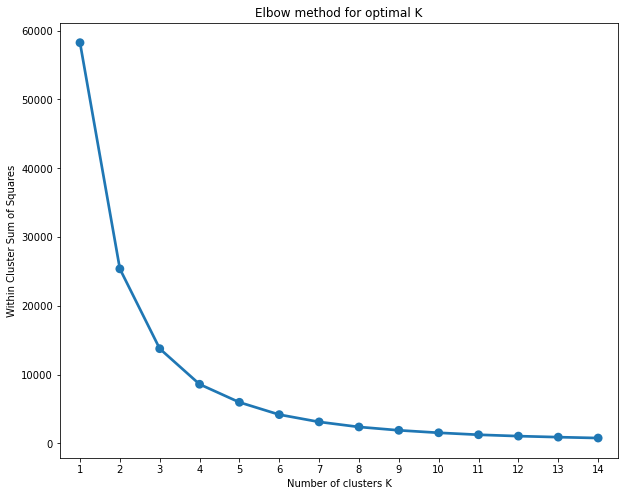

In [21]:
wcss={} #wcss stands for within cluster sum of squares

for k in range(1,15):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000 , random_state=20)
    km = km.fit(scaled_df)
    wcss[k] = km.inertia_
    
#Plot graph for the wcss values and the number of clusters
plt.figure(figsize=(10,8))
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.xlabel('Number of clusters K')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Elbow method for optimal K')
plt.show()

- Based on the Elbow Method, optimal K would be 3 as there is a less steep decrease in the within cluster sum of squares after 3.

In [22]:
#Build K Means clustering model using K=3
kmean_model = KMeans(n_clusters=3, init='k-means++', max_iter=1000, random_state=20)
kmean_model.fit(scaled_df)

#find the clusters for the customers
RFM_non_repeat_cust_df['Segment'] = kmean_model.labels_ + 1 #start cluster naming from 1

RFM_non_repeat_cust_df.head()

,ID,Recency,Frequency,Monetary,Segment
2,4,1100,1,300.0,1
4,6,1097,1,254.0,1
6,8,1100,1,629.0,2
8,10,1098,1,243.0,1
10,12,1100,1,373.0,1


### Visualise the Kmeans Segments & Define Customer Profile in each Segment

In [23]:
RFM_non_repeat_cust_df['Segment'].value_counts()

1    42693
2    13975
3     1591
Name: Segment, dtype: int64

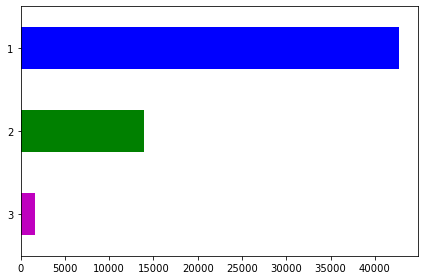

In [24]:
RFM_non_repeat_cust_df['Segment'].value_counts().sort_index(ascending=False).plot(kind='barh',color=['m','g','b','r'])
plt.tight_layout()
plt.show()

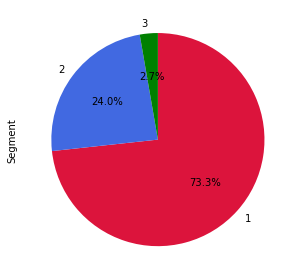

In [25]:
RFM_non_repeat_cust_df['Segment'].value_counts().sort_index().plot(kind='pie',colors=['crimson','royalblue','green','darkorchid'],autopct='%1.1f%%',counterclock=False,startangle=90)
plt.tight_layout()
plt.show()

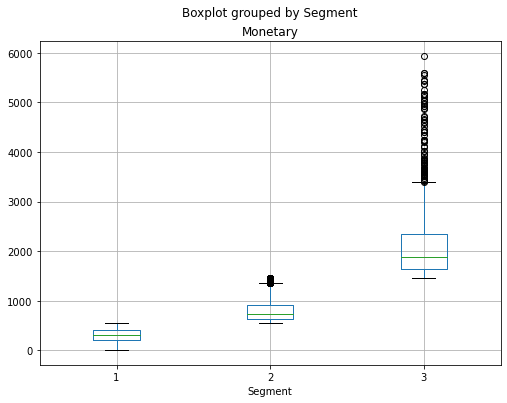

In [26]:
# Plot the boxplot of Monetary by Segment
RFM_non_repeat_cust_df.boxplot('Monetary', by='Segment', figsize=(8,6))

# Show the figure
plt.show()

In [27]:
RFM_non_repeat_cust_df['Monetary'].describe()

count    58259.000000
mean       471.347631
std        394.758647
min          1.000000
25%        240.000000
50%        378.000000
75%        571.500000
max       5947.800000
Name: Monetary, dtype: float64

In [28]:
RFM_non_repeat_cust_df.groupby('Segment')['Monetary'].agg('mean').to_frame()

,Monetary
Segment,
1,303.058478
2,800.182537
3,2098.815273


- Segment 1: Low-moderate monetary value
- Segment 2: High monetary value
- Segment 3: Very high monetary value

### Do segmentation for customers with `Frequency` > 1

In [29]:
RFM_repeat_cust_df.head()

,ID,Recency,Frequency,Monetary
0,1,151,3,476.30
28,31,591,9,1338.99
315,379,189,11,1248.00
346,413,587,2,416.50
406,482,551,3,410.00


### Classification Model

<div class="alert alert-warning">

- to stack RFM_non_repeat_cust_df and RFM_repeat_cust_df first
- then merge back with df

In [103]:
# Join RFM_df and df based on ID column
segmented_df = pd.merge(RFM_df[['ID', 'Segment']], df, on='ID', how='inner')
segmented_df = segmented_df.loc[:, ~segmented_df.columns.str.contains('^Unnamed')]
segmented_df = segmented_df.drop(['NameHash', 'DocIDHash'], axis=1)
nationality_enconder = LabelEncoder()
segmented_df['Nationality'] = nationality_enconder.fit_transform(segmented_df['Nationality'])

# Show the joined dataframe
segmented_df.head()

,ID,Segment,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator,TotalRevenue
0,4,1,55,60.0,1095,93,240.0,60.0,0,0,...,0,1,0,0,0,0,0,0,1,300.0
1,6,1,82,54.0,1095,58,230.0,24.0,0,0,...,0,1,0,0,0,0,0,1,0,254.0
2,8,2,55,32.0,1095,38,535.0,94.0,0,0,...,0,1,0,0,0,0,0,1,0,629.0
3,10,1,73,25.0,1095,96,174.0,69.0,0,0,...,0,1,0,0,0,0,0,0,1,243.0
4,12,1,55,58.0,1095,60,292.0,81.0,0,0,...,0,1,0,0,0,0,0,0,1,373.0


In [104]:
X = segmented_df.drop('Segment', axis=1).values
y = segmented_df['Segment'].values
le = LabelEncoder()
y = le.fit_transform(y) # encode class labels into numeric values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train a classifier
clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train)

# Test the classifier on the testing data
y_pred = clf.predict(X_test) 

# Evaluate the classifier performance
acc = accuracy_score(y_test, y_pred) # calculate accuracy
cm = confusion_matrix(y_test, y_pred) # calculate confusion matrix
cr = classification_report(y_test, y_pred) # generate classification report

print(f'Accuracy: {acc}')
print(f'Confusion matrix:\n {cm}')
print(f'Classification report:\n {cr}')

Accuracy: 1.0
Confusion matrix:
 [[8571    0    0]
 [   0 2764    0]
 [   0    0  317]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8571
           1       1.00      1.00      1.00      2764
           2       1.00      1.00      1.00       317

    accuracy                           1.00     11652
   macro avg       1.00      1.00      1.00     11652
weighted avg       1.00      1.00      1.00     11652



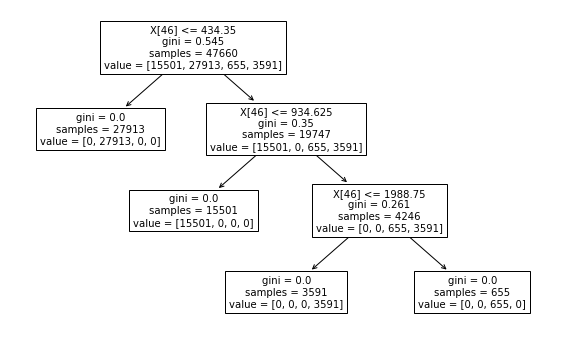

In [52]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the decision tree with feature names
plot_tree(clf)

# Show the figure
plt.show()